In [1]:
!pip install NEURON

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 5.4 MB/s eta 0:00:00


In [2]:
repo_name = 'BIOL7409Final2'

if 'google.colab' in str(get_ipython()): # Running on colab
    import os        
    # from distutils.dir_util import copy_tree
    if not os.path.exists(repo_name):
        !git clone https://github.com/aryanlalwani/{repo_name}.git # downloads repository into our Google colab session's file system        
    
    os.chdir('/content/' + repo_name)   
!nrnivmodl mechanisms2

Cloning into 'BIOL7409Final2'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 95 (delta 26), reused 23 (delta 11), pack-reused 47
Unpacking objects: 100% (95/95), 1.58 MiB | 3.84 MiB/s, done.
/content/BIOL7409Final2
Mod files: "mechanisms2/mechanisms2/cad.mod" "mechanisms2/mechanisms2/ca.mod" "mechanisms2/mechanisms2/gabaa.mod" "mechanisms2/mechanisms2/ichan_T875M.mod" "mechanisms2/mechanisms2/ichanWT2005.mod" "mechanisms2/mechanisms2/ichanWT.mod" "mechanisms2/mechanisms2/kca.mod" "mechanisms2/mechanisms2/km.mod" "mechanisms2/mechanisms2/kv.mod" "mechanisms2/mechanisms2/na12.mod" "mechanisms2/mechanisms2/na16.mod" "mechanisms2/mechanisms2/Nav11.mod" "mechanisms2/mechanisms2/Nav11_R1648H.mod" "mechanisms2/mechanisms2/Nav11_T875M.mod"

Creating 'x86_64' directory for .o files.

 -> NMODL ../mechanisms2/ca.mod
 -> NMODL ../mechanisms2/cad.mod
 -> Compiling mod_func.cpp
 -> NMODL ../mecha

In [3]:
from neuron import h
from neuron import gui
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

Generating FI curve using current injections in the ichanWT2005 model and a modified ichanWT2005 model that has a channel with a mutated s gate. 

In [4]:
# channel_name1 = 'ichanWT'
# soma1 = h.Section(name='soma')
# soma1.insert(channel_name1)

In [5]:

# #Geometry
# soma1.diam = 25
# soma1.L = 25
# soma1.nseg = 1

# # Biophysics
# soma1.enat = 50
# soma1.ekf = -80
# soma1.gnatbar_ichanWT = 0.2
# soma1.gkfbar_ichanWT = 0.016
# soma1.gl_ichanWT = 0.0005
# soma1.el_ichanWT = -60

# ic = h.IClamp(soma1(0.5))
# ic.delay = 50
# ic.dur = 200


# h.v_init = -61 # mV - initial voltage of the model system 
# h.dt = 0.005  # ms - time step
# h.celsius = 21 # degrees celsius - temperature of simulation, set to room temperature
# h.tstop = 250

# # sTau_vec = h.Vector().record(soma(0.5)._ref_sTau_nav11)
# # hTau_vec = h.Vector().record(soma(0.5)._ref_hTau_nav11)

# netcon = h.NetCon(soma1(0.5)._ref_v,None, sec=soma1) # Use NetCon to monitor axon voltage 
# netcon.threshold = 0 # set threshold to detect AP
# # Record spike times
# spike_times = h.Vector()
# netcon.record(spike_times) # pass the spiketimes vector to the record method of the netcon object we just created

# amp_vec = np.linspace(0.15, 0.6, 50) # create vector here

# F_vec1 = []
# for amp in amp_vec:
#     ic.amp = amp # nA
#     # Run
#     h.run()
#     Fi = len(spike_times) # number of spikes divided by length of simulation in sec
#     F_vec1.append(Fi)  

# ic.amp = 0.1


In [6]:
# channel_name2 = 'ichanT875M'
# soma2 = h.Section(name='soma')
# soma2.insert(channel_name2)

In [7]:
# #Geometry
# soma2.diam = 25
# soma2.L = 25
# soma2.nseg = 1

# # Biophysics
# soma2.enat = 50
# soma2.ekf = -80
# soma2.gnatbar_ichanT875M = 0.2
# soma2.gkfbar_ichanT875M = 0.016
# soma2.gl_ichanT875M = 0.0005
# soma2.el_ichanT875M = -60

# ic = h.IClamp(soma2(0.5))
# ic.delay = 50
# ic.dur = 200


# h.v_init = -61 # mV - initial voltage of the model system 
# h.dt = 0.005  # ms - time step
# h.celsius = 21 # degrees celsius - temperature of simulation, set to room temperature
# h.tstop = 250

# # sTau_vec = h.Vector().record(soma(0.5)._ref_sTau_nav11)
# # hTau_vec = h.Vector().record(soma(0.5)._ref_hTau_nav11)

# netcon = h.NetCon(soma2(0.5)._ref_v,None, sec=soma2) # Use NetCon to monitor axon voltage 
# netcon.threshold = 0 # set threshold to detect AP
# # Record spike times
# spike_times = h.Vector()
# netcon.record(spike_times) # pass the spiketimes vector to the record method of the netcon object we just created

# amp_vec = np.linspace(0.15, 0.6, 50) # create vector here

# F_vec2 = []
# for amp in amp_vec:
#     ic.amp = amp # nA
#     # Run
#     h.run()
#     Fi = len(spike_times) # number of spikes divided by length of simulation in sec
#     F_vec2.append(Fi)  

# ic.amp = 0.1

In [8]:
# # Plotting code goes here
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(amp_vec, F_vec1, label = 'Wild Type')
# ax.plot(amp_vec, F_vec2, label = 'Mutant')
# ax.set_ylabel('Frequency')
# ax.set_xlabel('Current Amplitude')
# ax.set_title('Action Potentials')
# ax.legend()

Creating FI curves using the Nav11 channel and the mutant Nav11 channel, including passive and potassium rectifier current using parameters described in Spampanato et al. 2004.

In [15]:
soma3 = h.Section(name='soma')
soma3.diam = 25
soma3.L = 20
soma3.nseg = 1

# Biophysics
soma3.cm = 1
soma3.insert('pas')
soma3.insert('extracellular')
soma3.g_pas = 5e-4
soma3.e_pas = -60
soma3.insert('nav11')
soma3.gbar_nav11 = 0.2 #S/cm^2
soma3.ena = 50
soma3.insert('kv')
soma3.gbar_kv = 160 #pS/um^2
soma3.ek = -80


ic = h.IClamp(soma3(0.5))
ic.delay = 50
ic.dur = 300
ic.amp = 0.1

t_vec = h.Vector().record(h._ref_t)
soma3_v = h.Vector().record(soma3(0.5)._ref_v)



h.v_init = -60 # mV - initial voltage of the model system 
h.dt = 0.005  # ms - time step
h.celsius = 21 # degrees celsius - temperature of simulation, set to room temperature
h.tstop = 350

netcon = h.NetCon(soma3(0.5)._ref_v,None, sec=soma3) # Use NetCon to monitor axon voltage 
netcon.threshold = 0 # set threshold to detect AP
# Record spike times
spike_times = h.Vector()
netcon.record(spike_times) # pass the spiketimes vector to the record method of the netcon object we just created

amp_vec = np.linspace(0.15, 0.6, 50) # create vector here

F_vec3 = []
for amp in amp_vec:
    ic.amp = amp # nA
    # Run
    h.run()
    if (amp > 0.49) and (amp < 0.5):
      soma_wild_v = np.array(soma3_v)
    Fi = len(spike_times) # number of spikes divided by length of simulation in sec
    F_vec3.append(Fi)  

ic.amp = 0.1

In [ ]:
np.linspace(0.15,0.6,50)

In [16]:
soma4 = h.Section(name='soma')
soma4.diam = 25
soma4.L = 20
soma4.nseg = 1

# Biophysics
soma4.cm = 1
soma4.insert('pas')
soma4.insert('extracellular')
soma4.g_pas = 5e-4
soma4.e_pas = -60
soma4.insert('nav11_T875M')
soma4.gbar_nav11_T875M = 0.2 #S/cm^2
soma4.ena = 50
soma4.insert('kv')
soma4.gbar_kv = 160 # pS/um^2
soma4.ek = -80


ic = h.IClamp(soma4(0.5))
ic.delay = 50
ic.dur = 300
ic.amp = 0.1
soma4_v = h.Vector().record(soma4(0.5)._ref_v)

h.v_init = -60 # mV - initial voltage of the model system 
h.dt = 0.005  # ms - time step
h.celsius = 21 # degrees celsius - temperature of simulation, set to room temperature
h.tstop = 350

netcon = h.NetCon(soma4(0.5)._ref_v,None, sec=soma4) # Use NetCon to monitor axon voltage 
netcon.threshold = 0 # set threshold to detect AP
# Record spike times
spike_times = h.Vector()
netcon.record(spike_times) # pass the spiketimes vector to the record method of the netcon object we just created

amp_vec = np.linspace(0.15, 0.6, 50) # create vector here

F_vec4 = []
for amp in amp_vec:
    ic.amp = amp # nA
    # Run
    h.run()
    if (amp > 0.49) and (amp < 0.5):
      soma_mut_v = np.array(soma4_v)
    Fi = len(spike_times) # number of spikes divided by length of simulation in sec
    F_vec4.append(Fi)  

ic.amp = 0.1

In [12]:
soma5 = h.Section(name='soma')
soma5.diam = 25
soma5.L = 20
soma5.nseg = 1

# Biophysics
soma5.cm = 1
soma5.insert('pas')
soma5.insert('extracellular')
soma5.g_pas = 5e-4
soma5.e_pas = -60
soma5.insert('nav11_R1648H')
soma5.gbar_nav11_R1648H = 0.2 #S/cm^2
soma5.ena = 50
soma5.insert('kv')
soma5.gbar_kv = 160 # pS/um^2
soma5.ek = -80


ic = h.IClamp(soma5(0.5))
ic.delay = 50
ic.dur = 200
ic.amp = 0.1

h.v_init = -60 # mV - initial voltage of the model system 
h.dt = 0.005  # ms - time step
h.celsius = 21 # degrees celsius - temperature of simulation, set to room temperature
h.tstop = 250

netcon = h.NetCon(soma5(0.5)._ref_v,None, sec=soma5) # Use NetCon to monitor axon voltage 
netcon.threshold = 0 # set threshold to detect AP
# Record spike times
spike_times = h.Vector()
netcon.record(spike_times) # pass the spiketimes vector to the record method of the netcon object we just created

amp_vec = np.linspace(0.15, 0.6, 50) # create vector here

F_vec5 = []
for amp in amp_vec:
    ic.amp = amp # nA
    # Run
    h.run()
    Fi = len(spike_times) # number of spikes divided by length of simulation in sec
    F_vec5.append(Fi)  

ic.amp = 0.1

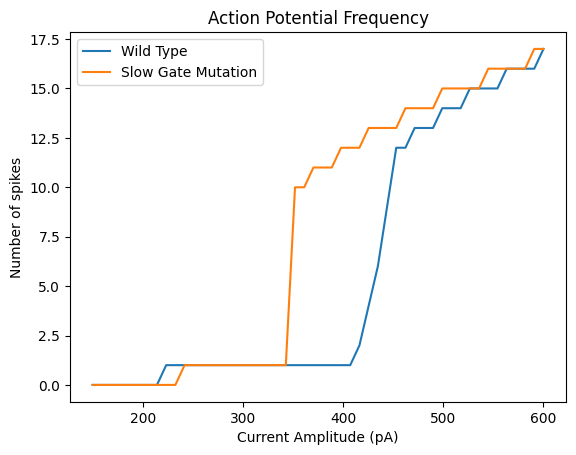

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(amp_vec*1e3, F_vec3,label='Wild Type')
ax.plot(amp_vec*1e3,F_vec4,label='Slow Gate Mutation')
# ax.plot(amp_vec*1e3,F_vec5,label='Mutant R1648H')
ax.set_ylabel('Number of spikes')
ax.set_xlabel('Current Amplitude (pA)')
ax.set_title('Action Potential Frequency')
ax.legend()

We chose this one over the ichanWT2005 becasue it more accurately matched the data from the actual paper. 

Text(0.5, 0, 'time (ms)')

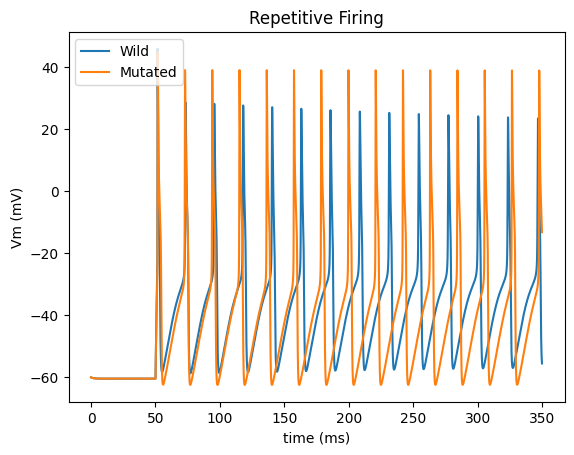

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_vec,soma_wild_v,label='Wild')
ax.plot(t_vec,soma_mut_v,label='Mutated')
ax.set_title("Repetitive Firing")
ax.set_ylabel('Vm (mV)');
# ax.set_ylim(-80,50)
ax.legend();
ax.set_xlabel('time (ms)')